In [ ]:
print("haha")

haha


In [ ]:
print("llll")

llll


In [ ]:
import torch
from torchvision import transforms, models
import torch.nn as nn
import numpy as np
alexnet = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


In [ ]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
import os, zipfile, requests
import torchvision

filenames = ["catvdog_clear.zip",
             "catvdog_blur_2.zip",
             "catvdog_blur_5.zip"]

urls = ["https://osf.io/hj2gd/download",
        "https://osf.io/xp6qd/download",
        "https://osf.io/wj43a/download"]
for fname, url in zip(filenames, urls):
  if not os.path.isfile(fname):
    try:
      r = requests.get(url)
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname, "wb") as fid:
          fid.write(r.content)

for fname in filenames:
  zip_ref = zipfile.ZipFile(fname, 'r')
  zip_ref.extractall()
  zip_ref.close()
  os.remove(fname)

# Define Preprocessing Filters
preprocessing = transforms.Compose([transforms.ToTensor(),
                                    transforms.Resize((256, 256)),
                                    transforms.Normalize((0.5, 0.5, 0.5),
                                                         (0.5, 0.5, 0.5))])

# Create Clean Training Dataset using ImageFolder
clear_train_data = torchvision.datasets.ImageFolder(
    root="dataset/train",
    transform=preprocessing
)

# Create Clean Test Dataset using ImageFolder
clear_test_data = torchvision.datasets.ImageFolder(
    root="dataset/test",
    transform=preprocessing
)

# Create Noisy Training Dataset using ImageFolder
noisy_train_data = torchvision.datasets.ImageFolder(
    root="dataset_blur_5/train",
    transform=preprocessing
)

# Create Noisy Test Dataset using ImageFolder
noisy_test_data = torchvision.datasets.ImageFolder(
    root="dataset_blur_5/test",
    transform=preprocessing
)


In [32]:
print(len(clear_train_data.imgs))
print(len(noisy_train_data.imgs))
nimgs = 100
print(clear_train_data.imgs[:100])


22442
22442
[('dataset/train/cat/1.jpg', 0), ('dataset/train/cat/10.jpg', 0), ('dataset/train/cat/100.jpg', 0), ('dataset/train/cat/1000.jpg', 0), ('dataset/train/cat/10000.jpg', 0), ('dataset/train/cat/10001.jpg', 0), ('dataset/train/cat/10002.jpg', 0), ('dataset/train/cat/10003.jpg', 0), ('dataset/train/cat/10004.jpg', 0), ('dataset/train/cat/10005.jpg', 0), ('dataset/train/cat/10006.jpg', 0), ('dataset/train/cat/10007.jpg', 0), ('dataset/train/cat/10008.jpg', 0), ('dataset/train/cat/10009.jpg', 0), ('dataset/train/cat/1001.jpg', 0), ('dataset/train/cat/10010.jpg', 0), ('dataset/train/cat/10011.jpg', 0), ('dataset/train/cat/10012.jpg', 0), ('dataset/train/cat/10013.jpg', 0), ('dataset/train/cat/10014.jpg', 0), ('dataset/train/cat/10015.jpg', 0), ('dataset/train/cat/10016.jpg', 0), ('dataset/train/cat/10017.jpg', 0), ('dataset/train/cat/10018.jpg', 0), ('dataset/train/cat/10019.jpg', 0), ('dataset/train/cat/1002.jpg', 0), ('dataset/train/cat/10020.jpg', 0), ('dataset/train/cat/10021.j

In [33]:
print(clear_train_data.imgs[0][0])

transform = transforms.Compose(
    [
      transforms.Resize((224, 224)),
      transforms.ToTensor()
    ]
)
from PIL import Image

for i in range(nimgs):

  aaa = 'cat'

  if i >= 50:
    aaa = 'dog'

  x = Image.open('dataset/train/' + aaa + '/' + str(i+1) + '.jpg').convert('RGB')
  im = transform(x)
  im.unsqueeze_(dim=0)

  alexnet1 = nn.Sequential(*list(alexnet.features.children())[:3])
  ly1 = alexnet1(im).data.numpy()

  alexnet2 = nn.Sequential(*list(alexnet.features.children())[:6])
  ly2 = alexnet2(im).data.numpy()

  alexnet3 = nn.Sequential(*list(alexnet.features.children())[:8])
  ly3 = alexnet3(im).data.numpy()

  alexnet4 = nn.Sequential(*list(alexnet.features.children())[:10])
  ly4 = alexnet4(im).data.numpy()

  alexnet5 = nn.Sequential(*list(alexnet.features.children())[:])
  ly5 = alexnet5(im).data.numpy()

  pool = nn.AdaptiveAvgPool2d(output_size=(6, 6))
  ly5_pool = pool(torch.from_numpy(ly5))

  ly5_pool = ly5_pool.data.numpy()
  ly5_pool = np.reshape(ly5_pool, [1, 256*6*6])
  ly5_pool = torch.from_numpy(ly5_pool)

  alexnet6 = nn.Sequential(*list(alexnet.classifier.children())[:4])
  ly6 = alexnet6(ly5_pool).data.numpy()

  alexnet7 = nn.Sequential(*list(alexnet.classifier.children())[:6])
  ly7 = alexnet7(ly5_pool).data.numpy()

  alexnet8 = nn.Sequential(*list(alexnet.classifier.children())[:])
  ly8 = alexnet8(ly5_pool).data.numpy()

  print(i)

  np.save('img' + str(i+1) + "_ly1.npy", ly1)
  np.save('img' + str(i+1) + "_ly2.npy", ly2)
  np.save('img' + str(i+1) + "_ly3.npy", ly3)
  np.save('img' + str(i+1) + "_ly4.npy", ly4)
  np.save('img' + str(i+1) + "_ly5.npy", ly5)
  np.save('img' + str(i+1) + "_ly6.npy", ly6)
  np.save('img' + str(i+1) + "_ly7.npy", ly7)
  np.save('img' + str(i+1) + "_ly8.npy", ly8)

dataset/train/cat/1.jpg
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99



Computing RDM

RDM computing finished!


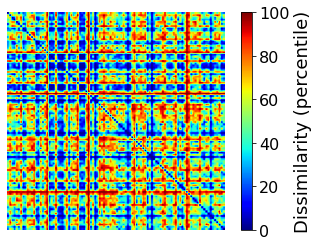


Computing RDM

RDM computing finished!


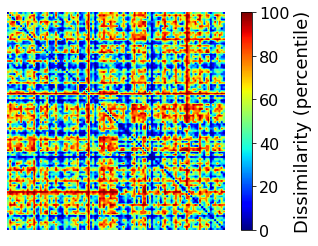


Computing RDM

RDM computing finished!


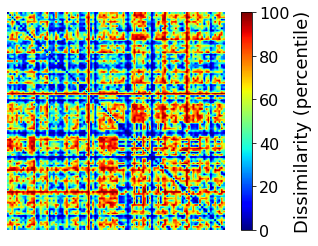


Computing RDM

RDM computing finished!


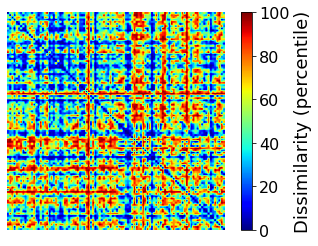


Computing RDM

RDM computing finished!


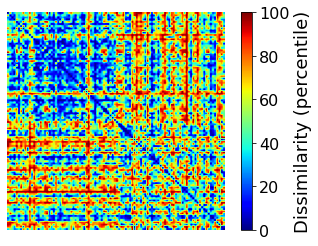


Computing RDM

RDM computing finished!


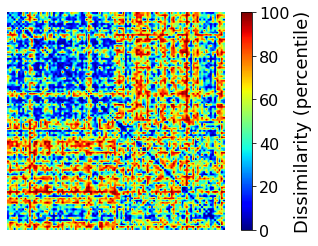


Computing RDM

RDM computing finished!


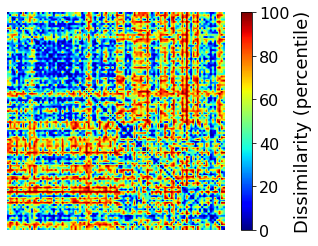


Computing RDM

RDM computing finished!


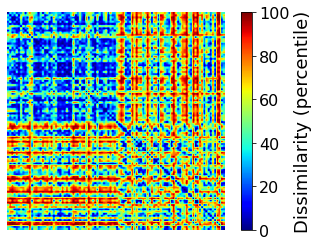

In [34]:
! pip install neurora
from neurora.rdm_cal import bhvRDM
from neurora.rsa_plot import plot_rdm

for i in range(8):
  n = np.load("img1_ly" + str(i+1) + ".npy").ravel().shape[0]
  activations = np.zeros([nimgs, n])
  for j in range(nimgs):
    activations[j] = np.load("img" + str(j+1) + "_ly" + str(i+1) + ".npy").ravel()
  activations = np.reshape(activations, [nimgs, n, 1])
  rdm = bhvRDM(activations, sub_opt=0, method='correlation')
  plot_rdm(rdm, percentile=True)
  np.save('clear_rdm_ly' + str(i+1) + '.npy', rdm)

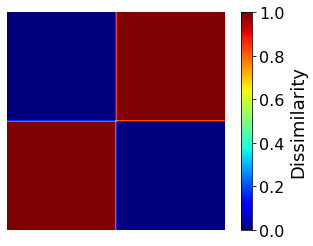

[2.88698493e-01 1.22628550e-95]


In [35]:
modelrdm = np.zeros([100, 100])
modelrdm[:50, 50:] = 1
modelrdm[50:, :50] = 1

plot_rdm(modelrdm)

clear_rdm_ly8 = np.load('clear_rdm_ly8.npy')
from neurora.rdm_corr import rdm_correlation_spearman
print(rdm_correlation_spearman(modelrdm, clear_rdm_ly8))

In [36]:
for i in range(nimgs):

  aaa = 'cat'

  if i >= 50:
    aaa = 'dog'

  x = Image.open('dataset_blur_5/train/' + aaa + '/' + str(i+1) + '.jpg').convert('RGB')
  im = transform(x)
  im.unsqueeze_(dim=0)

  alexnet1 = nn.Sequential(*list(alexnet.features.children())[:3])
  ly1 = alexnet1(im).data.numpy()

  alexnet2 = nn.Sequential(*list(alexnet.features.children())[:6])
  ly2 = alexnet2(im).data.numpy()

  alexnet3 = nn.Sequential(*list(alexnet.features.children())[:8])
  ly3 = alexnet3(im).data.numpy()

  alexnet4 = nn.Sequential(*list(alexnet.features.children())[:10])
  ly4 = alexnet4(im).data.numpy()

  alexnet5 = nn.Sequential(*list(alexnet.features.children())[:])
  ly5 = alexnet5(im).data.numpy()

  pool = nn.AdaptiveAvgPool2d(output_size=(6, 6))
  ly5_pool = pool(torch.from_numpy(ly5))

  ly5_pool = ly5_pool.data.numpy()
  ly5_pool = np.reshape(ly5_pool, [1, 256*6*6])
  ly5_pool = torch.from_numpy(ly5_pool)

  alexnet6 = nn.Sequential(*list(alexnet.classifier.children())[:4])
  ly6 = alexnet6(ly5_pool).data.numpy()

  alexnet7 = nn.Sequential(*list(alexnet.classifier.children())[:6])
  ly7 = alexnet7(ly5_pool).data.numpy()

  alexnet8 = nn.Sequential(*list(alexnet.classifier.children())[:])
  ly8 = alexnet8(ly5_pool).data.numpy()

  print(i)

  np.save('noisy_img' + str(i+1) + "_ly1.npy", ly1)
  np.save('noisy_img' + str(i+1) + "_ly2.npy", ly2)
  np.save('noisy_img' + str(i+1) + "_ly3.npy", ly3)
  np.save('noisy_img' + str(i+1) + "_ly4.npy", ly4)
  np.save('noisy_img' + str(i+1) + "_ly5.npy", ly5)
  np.save('noisy_img' + str(i+1) + "_ly6.npy", ly6)
  np.save('noisy_img' + str(i+1) + "_ly7.npy", ly7)
  np.save('noisy_img' + str(i+1) + "_ly8.npy", ly8)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99



Computing RDM

RDM computing finished!


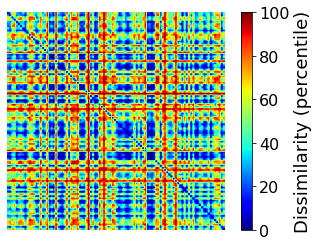


Computing RDM

RDM computing finished!


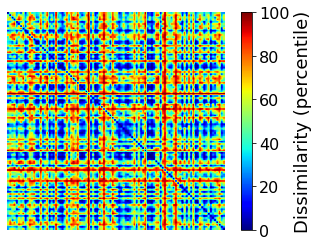


Computing RDM

RDM computing finished!


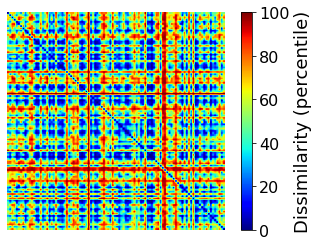


Computing RDM

RDM computing finished!


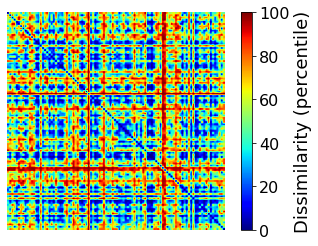


Computing RDM

RDM computing finished!


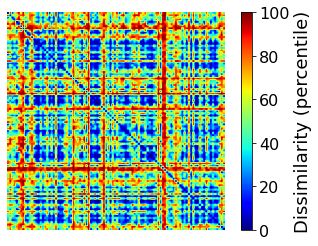


Computing RDM

RDM computing finished!


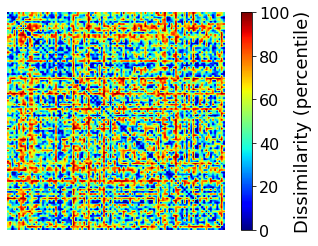


Computing RDM

RDM computing finished!


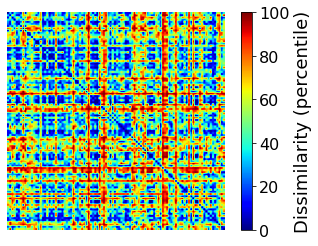


Computing RDM

RDM computing finished!


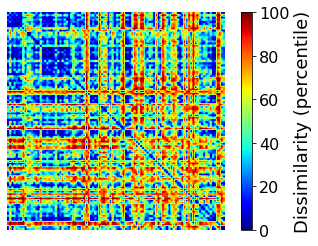

In [37]:
for i in range(8):
  n = np.load("noisy_img1_ly" + str(i+1) + ".npy").ravel().shape[0]
  activations = np.zeros([nimgs, n])
  for j in range(nimgs):
    activations[j] = np.load("noisy_img" + str(j+1) + "_ly" + str(i+1) + ".npy").ravel()
  activations = np.reshape(activations, [nimgs, n, 1])
  rdm = bhvRDM(activations, sub_opt=0, method='correlation')
  plot_rdm(rdm, percentile=True)
  np.save('noisy_rdm_ly' + str(i+1) + '.npy', rdm)

[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 6.07105397e-196 1.19364007e-079 2.09462427e-162 1.41814355e-181]
[1 2 3 4 5 6 7 8]


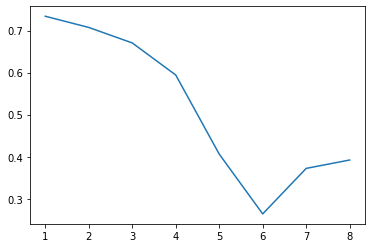

In [43]:
corr = np.zeros([8, 2])
for i in range(8):
  clear_rdm = np.load('clear_rdm_ly' + str(i+1) + '.npy')
  noisy_rdm = np.load('noisy_rdm_ly' + str(i+1) + '.npy')
  corr[i] = rdm_correlation_spearman(clear_rdm, noisy_rdm)

print(corr[:, 1])

import matplotlib.pyplot as plt

x = np.arange(1, 9)
print(x)
plt.plot(x, corr[:, 0])
plt.show()